In [8]:
import csv
import pandas as pd
import matplotlib.pyplot as plt

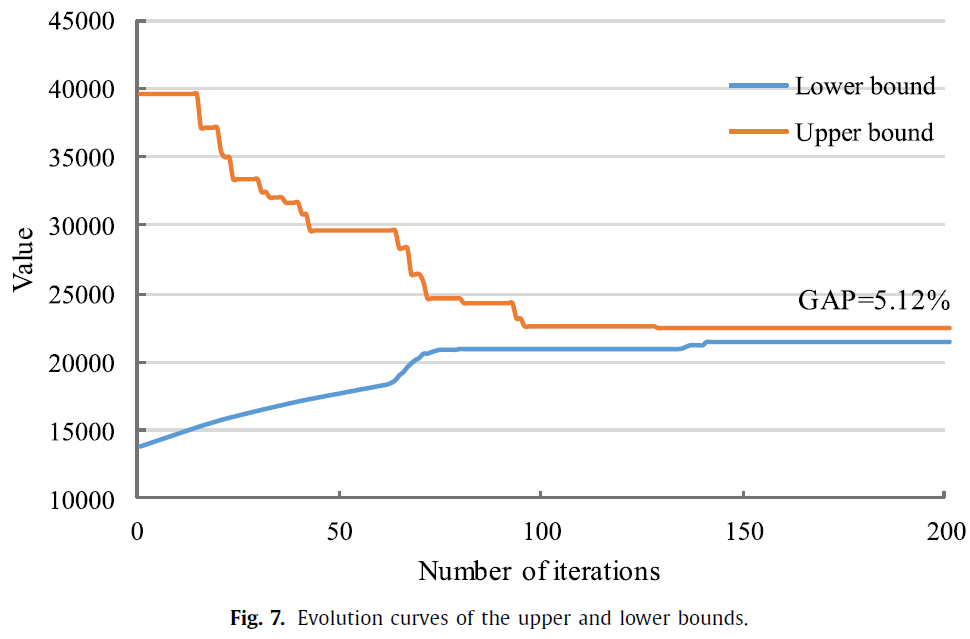

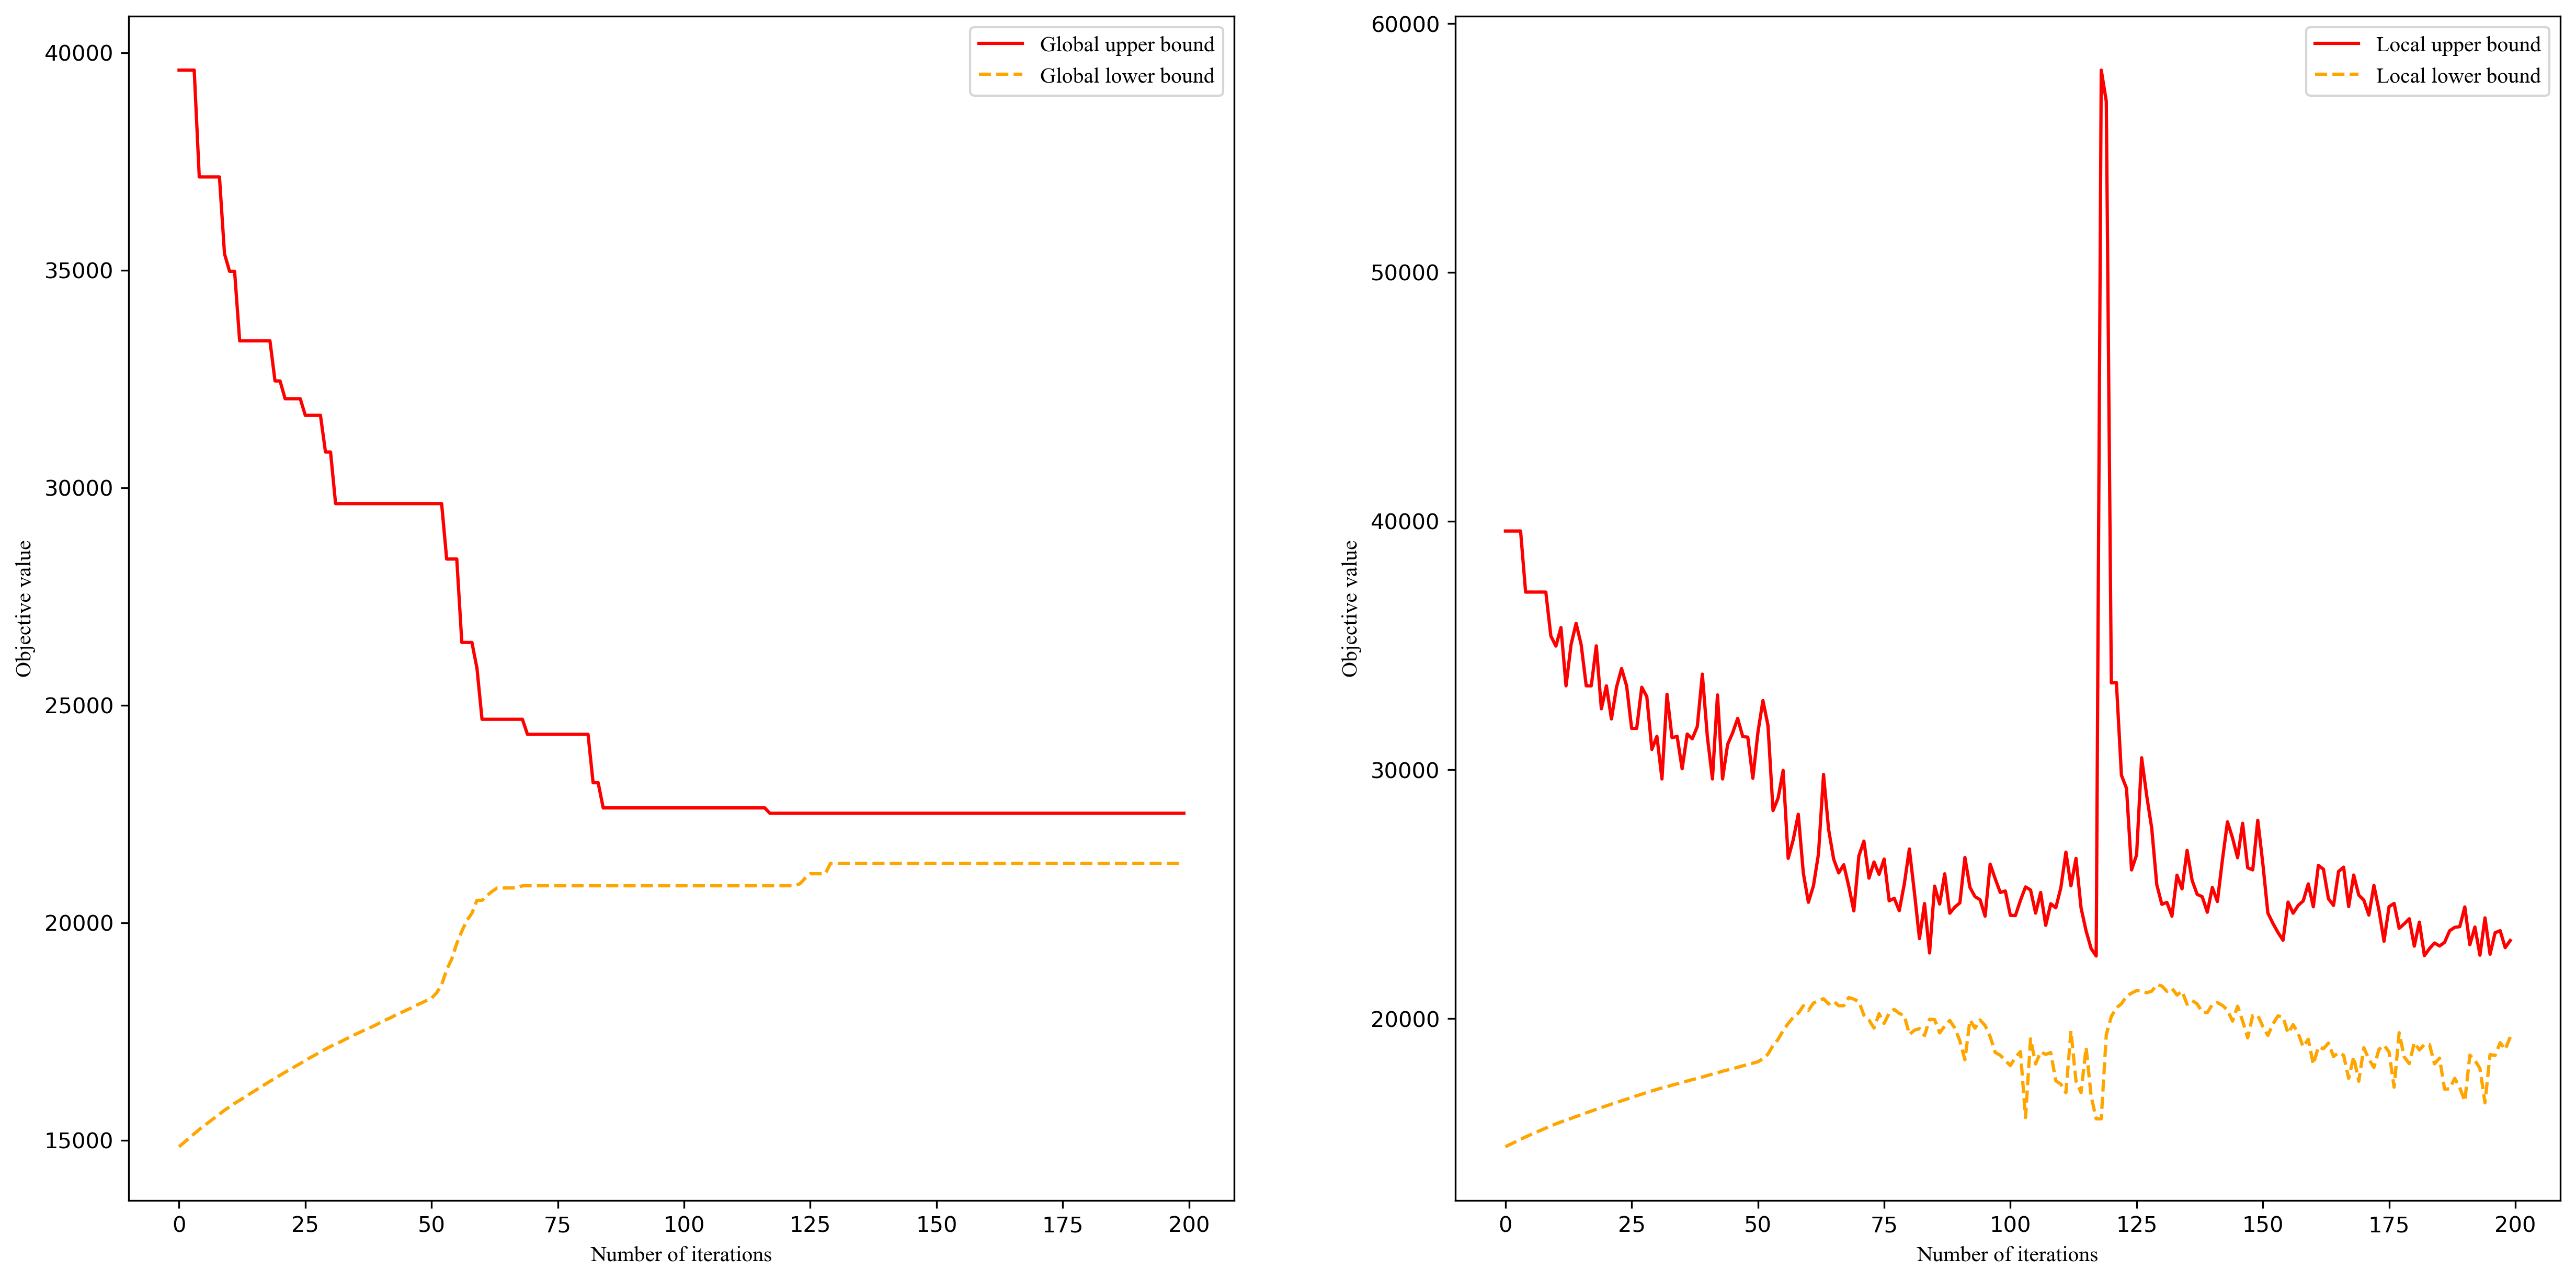

In [9]:
gap_df = pd.read_csv("output_gap.csv")
iter_list = list(gap_df["iteration"])
glob_ub = list(gap_df["glob_UB"])
glob_lb = list(gap_df["glob_LB"])
loc_ub = list(gap_df["loc_UB"])
loc_lb = list(gap_df["loc_LB"])

plt.rcParams['savefig.dpi'] = 300
plt.rcParams['figure.dpi'] = 300
f = plt.figure(figsize=(20, 10))
ax = f.add_subplot(121)
ax.plot(iter_list, glob_ub, color="red")
ax.plot(iter_list, glob_lb, color='orange', linestyle='--')
ax.set_xlabel('Number of iterations', fontname="Times New Roman")
ax.set_ylabel('Objective value', fontname="Times New Roman")
ax.legend(labels=['Global upper bound', 'Global lower bound'], loc='best', prop={'family': 'Times New Roman'})

ax2 = f.add_subplot(122)
ax2.plot(iter_list, loc_ub, color="red")
ax2.plot(iter_list, loc_lb, color='orange', linestyle='--')
ax2.set_xlabel('Number of iterations', fontname="Times New Roman")
ax2.set_ylabel('Objective value', fontname="Times New Roman")
ax2.legend(labels=['Local upper bound', 'Local lower bound'], loc='best', prop={'family': 'Times New Roman'})
f.savefig("fig_gap.svg")

In [24]:
class Node:
    def __init__(self):
        self.node_id = 0
        self.x = 0.0
        self.y = 0.0
        self.type = 0
        self.outgoing_node_id_list = []
        self.outgoing_node_size = 0
        self.outgoing_link_obj_list = []
        self.weight = 0.0
        self.volume = 0.0
        self.m_activity_node_beginning_time = 0
        self.m_activity_node_ending_time = 0
        self.base_profit_for_admm = 0
        self.base_profit_for_lr = 0
        
base_profit = 150
g_number_of_nodes = 0
g_number_of_customers = 0
g_node_list = []

node = Node()
node.node_id = 0
node.type = 1
node.x = 116.571614
node.y = 39.792844
node.m_activity_node_beginning_time = 0
node.m_activity_node_ending_time = 960
g_node_list.append(node)
g_number_of_nodes += 1

with open('input_node_100.csv', 'r') as fp:
    print('read input_node_100.csv')

    reader = csv.DictReader(fp)
    for line in reader:
        node = Node()
        node.node_id = int(line["ID"])
        node.type = 2
        node.x = float(line["lng"])
        node.y = float(line["lat"])
        node.weight = float(line["pack_total_weight"])
        node.volume = float(line["pack_total_volume"])
        node.m_activity_node_beginning_time = int(line["first_receive_tm"])
        node.m_activity_node_ending_time = int(line["last_receive_tm"])
        g_node_list.append(node)
        node.base_profit_for_admm = base_profit
        node.base_profit_for_lr = base_profit
        g_number_of_nodes += 1
        g_number_of_customers += 1
print('customers_number:{}'.format(g_number_of_customers))

# step 1.3: set the destination node
node = Node()
node.type = 1
node.node_id = g_number_of_nodes
node.x = 116.571614
node.y = 39.792844
node.m_activity_node_beginning_time = 0
node.m_activity_node_ending_time = 960
g_node_list.append(node)
g_number_of_nodes += 1

print('nodes_number:{}'.format(g_number_of_nodes))


read input_node_100.csv
customers_number:99
nodes_number:101


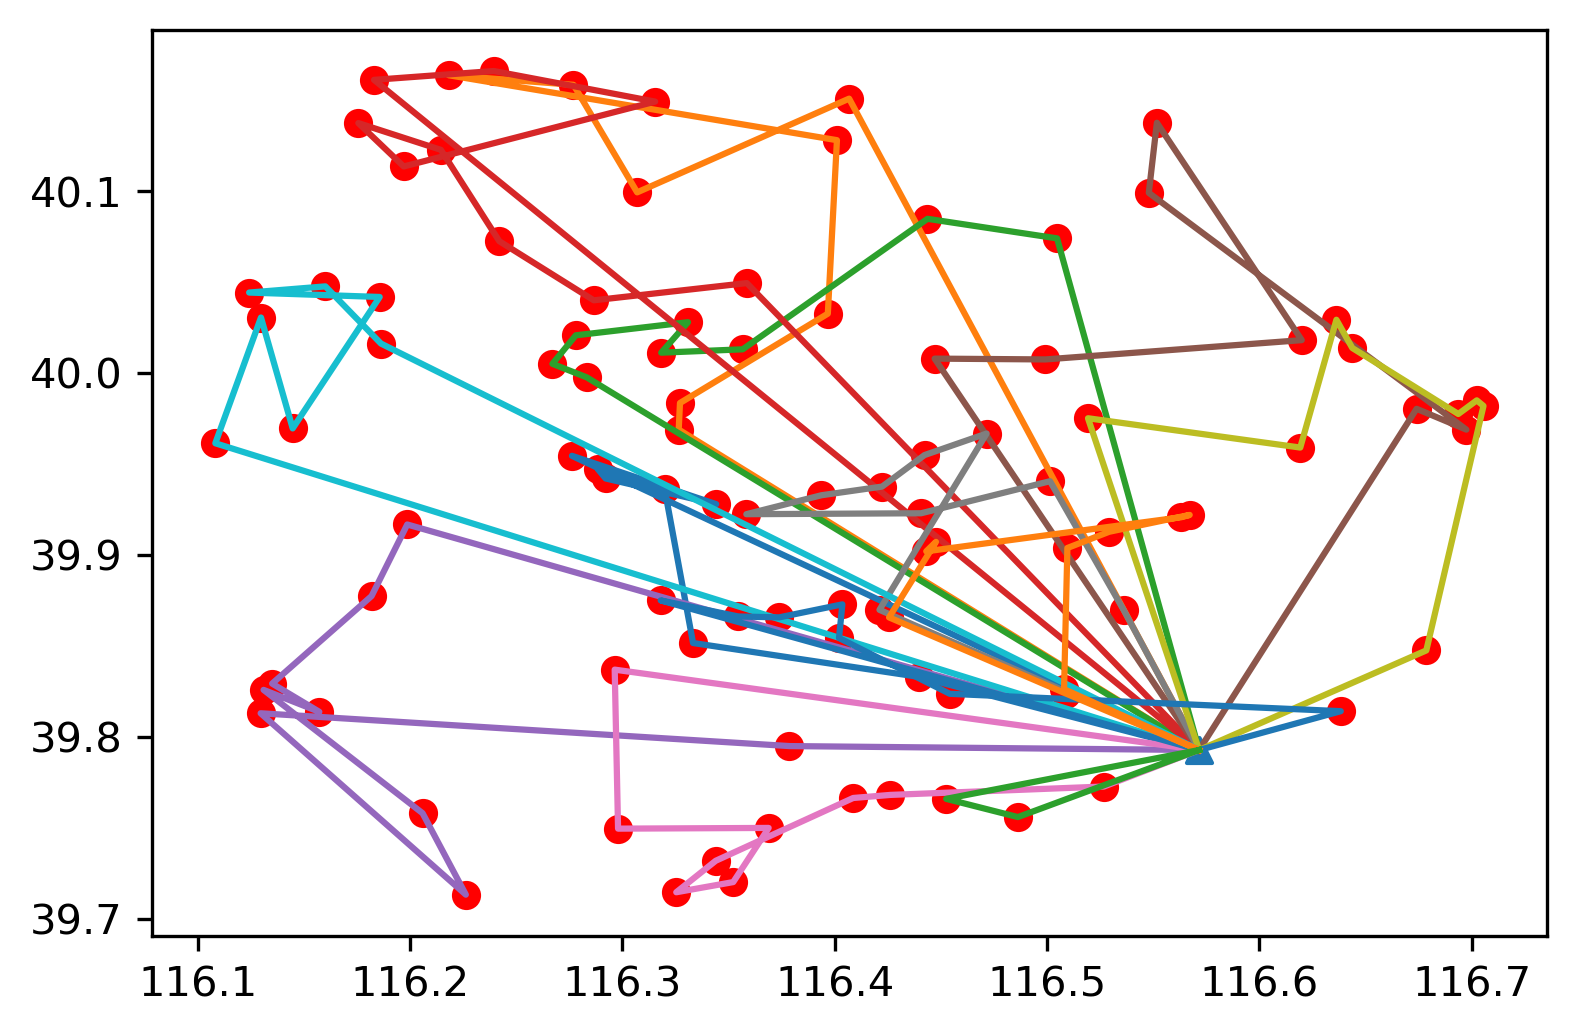

In [31]:
path_df = pd.read_excel("optimal_path.xlsx")
path_node_seq = list(path_df["path_node_seq"])
plt.figure()
for path in path_node_seq:
    x_list = [116.571614]
    y_list = [39.792844]
    path = path.strip().split('_')
    del path[-1]
    for n in path:
        n = int(n)
        node = g_node_list[n]
        x_list.append(node.x)
        y_list.append(node.y)
    plt.plot(x_list,y_list)

x = 116.571614
y = 39.792844
plt.scatter(x,y, marker="^")
for i in range(1,g_number_of_nodes-1):
    node = g_node_list[i]
    plt.scatter(node.x,node.y,color="r")
plt.savefig("optimal_path.svg")